In [2]:

    
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob 
import pandas as pd 
from shutil import copyfile 

annotations = glob('C:\\Users\\Charan\\Desktop\\BCCD_Dataset-master\\BCCD\\Annotations\\*.xml') 

df = []
cnt = 0 

for file in annotations: 
    prev_filename = file.split('/')[-1].split('.')[0] + '.jpg' 
    
    filename = str(cnt) + '.jpg' 
    row = [] 
    parsedXML = ET.parse(file)

    for node in parsedXML.getroot().iter('object'):
        blood_cells = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text) 
        xmax = int(node.find('bndbox/xmax').text) 
        ymin = int(node.find('bndbox/ymin').text) 
        ymax = int(node.find('bndbox/ymax').text) 
        row = [prev_filename, filename, blood_cells, xmin, xmax, ymin, ymax] 
        df.append(row) 
        cnt += 1 
    
data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']) 
data[['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('blood_cell_detection.csv', index=False)

In [3]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [ ]:
C:\Users\Charan\Desktop\BCCD_Dataset-master\BCCD\ImageSets\Main

In [ ]:
train = pd.read_csv(‘train.csv’)
train.head()

In [4]:
# read the csv file using read_csv function of pandas
train = pd.read_csv("blood_cell_detection.csv")
train.head()

,filename,cell_type,xmin,xmax,ymin,ymax
0,0.jpg,WBC,260,491,177,376
1,0.jpg,RBC,78,184,336,435
2,0.jpg,RBC,63,169,237,336
3,0.jpg,RBC,214,320,362,461
4,0.jpg,RBC,414,506,352,445


In [5]:
# Number of unique training images
train['filename'].nunique()

364

In [6]:
# Number of classes
train['cell_type'].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

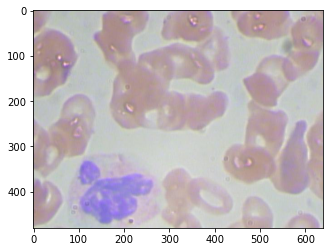

In [7]:
# reading single image using imread function of matplotlib
image = plt.imread('C:\\Users\\Charan\\Desktop\\BCCD_Dataset-master\\BCCD\\JPEGImages\\BloodImage_00001.jpg')
plt.imshow(image)

In [8]:
# Number of unique training images
train['filename'].nunique()

364

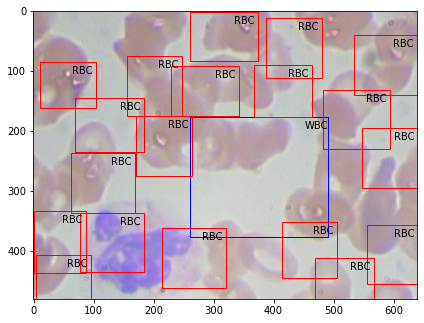

In [17]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('C:\\Users\\Charan\\Desktop\\BCCD_Dataset-master\\BCCD\\JPEGImages\\BloodImage_00001.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.filename == "0.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

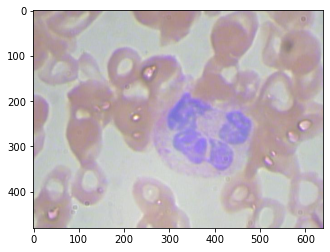

In [16]:
ax = fig.add_axes([0,0,1,0])

# read and plot the image
image = plt.imread('C:\\Users\\Charan\\Desktop\\BCCD_Dataset-master\\BCCD\\JPEGImages\\BloodImage_00000.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.filename == "0.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [20]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [21]:
import xml.etree.ElementTree as ET
import cv2

image = cv2.imread("C:\\Users\\Charan\\Desktop\\BCCD_Dataset-master\\BCCD\\JPEGImages\\BloodImage_00000.jpg")

tree = ET.parse('C:\\Users\\Charan\\Desktop\\BCCD_Dataset-master\\BCCD\\Annotations\\BloodImage_00005.xml')
for elem in tree.iter():
	if 'object' in elem.tag or 'part' in elem.tag:
		for attr in list(elem):
			if 'name' in attr.tag:
				name = attr.text
			if 'bndbox' in attr.tag:
				for dim in list(attr):
					if 'xmin' in dim.tag:
						xmin = int(round(float(dim.text)))
					if 'ymin' in dim.tag:
						ymin = int(round(float(dim.text)))
					if 'xmax' in dim.tag:
						xmax = int(round(float(dim.text)))
					if 'ymax' in dim.tag:
						ymax = int(round(float(dim.text)))
				if name[0] == "R":
					cv2.rectangle(image, (xmin, ymin),
								(xmax, ymax), (0, 255, 0), 1)
					cv2.putText(image, name, (xmin + 10, ymin + 15),
							cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 255, 0), 1)
				if name[0] == "W":
					cv2.rectangle(image, (xmin, ymin),
								(xmax, ymax), (0, 0, 255), 1)
					cv2.putText(image, name, (xmin + 10, ymin + 15),
							cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 0, 255), 1)
				if name[0] == "P":
					cv2.rectangle(image, (xmin, ymin),
								(xmax, ymax), (255, 0, 0), 1)
					cv2.putText(image, name, (xmin + 10, ymin + 15),
							cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (255, 0, 0), 1)

cv2.imshow("test", image)
cv2.imwrite("test.jpg", image)
cv2.waitKey()

-1

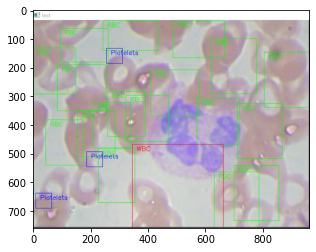

In [22]:
image1 = plt.imread('C:\\Users\\Charan\\Pictures\\Camera Roll\\image.jpg')
plt.imshow(image1)

In [23]:
data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']) 
data[['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('blood_cell_detection.csv', index=False)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import os

def filterFiles(directoryPath, extension):
    """
        This function filters the format files with the selected extension in the directory
        
        Args:
            directoryPath (str): relative path of the directory that contains text files
            extension (str): extension file
        Returns:
            The list of filtered files with the selected extension
    """    
    relevant_path = directoryPath
    included_extensions = [extension]
    file_names = [file1 for file1 in os.listdir(relevant_path) if any(file1.endswith(ext) for ext in included_extensions)]
    numberOfFiles = len(file_names)
    listParams = [file_names, numberOfFiles]
    return listParams

[image_names, numberOfFiles] = filterFiles(r"C:\Users\Charan\Desktop\BCCD_Dataset-master\BCCD\JPEGImages", "jpg")    

trainRCNN = pd.read_csv('blood_cell_detection.csv', sep=",", header=None)
trainRCNN.columns = ['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']
trainRCNN.head()

for imageFileName in image_names:    
    fig = plt.figure()
    #add axes to the image
    ax = fig.add_axes([0,0,1,1]) #adding X and Y axes from 0 to 1 for each direction 
    plt.axis('off')

    # read and plot the image
    image = plt.imread(r'C:\Users\Charan\Desktop\BCCD_Dataset-master\BCCD\JPEGImages/' + imageFileName)
    plt.imshow(image)
    # iterating over the image for different objects
    for _,row in trainRCNN[trainRCNN.filename == imageFileName].iterrows():
        xmin = float(row.xmin)
        xmax = float(row.xmax)
        ymin = float(row.ymin)
        ymax = float(row.ymax)
        
        width = xmax - xmin
        height = ymax - ymin
        ClassName= row.cell_type
        # assign different color to different classes of objects
        if row.cell_type == 'RBC':
            ax.annotate('RBC', xy=(xmax-40,ymin+20))
            rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'r', facecolor = 'none')
        elif row.cell_type == 'WBC':
            ax.annotate('WBC', xy=(xmax-40,ymin+20))
            rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'b', facecolor = 'none')
        elif row.cell_type == 'Platelets':
            ax.annotate('Platelets', xy=(xmax-40,ymin+20))
            rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'g', facecolor = 'none')        
        else:
            print("nothing")
    
        ax.add_patch(rect)   
        if not os.path.exists("imagesBox"):
            os.makedirs("imagesBox")

        fig.savefig('imagesBox/' + imageFileName, dpi=90, bbox_inches='tight')
    plt.close()
    print("ImageName: " + imageFileName + " is saved in imagesBox folder")
        
print("PLOTBOX COMPLETED!")

ImageName: BloodImage_00000.jpg is saved in imagesBox folder
ImageName: BloodImage_00001.jpg is saved in imagesBox folder
ImageName: BloodImage_00002.jpg is saved in imagesBox folder
ImageName: BloodImage_00003.jpg is saved in imagesBox folder
ImageName: BloodImage_00004.jpg is saved in imagesBox folder
ImageName: BloodImage_00005.jpg is saved in imagesBox folder
ImageName: BloodImage_00006.jpg is saved in imagesBox folder
ImageName: BloodImage_00007.jpg is saved in imagesBox folder
ImageName: BloodImage_00008.jpg is saved in imagesBox folder
ImageName: BloodImage_00009.jpg is saved in imagesBox folder
ImageName: BloodImage_00010.jpg is saved in imagesBox folder
ImageName: BloodImage_00011.jpg is saved in imagesBox folder
ImageName: BloodImage_00012.jpg is saved in imagesBox folder
ImageName: BloodImage_00013.jpg is saved in imagesBox folder
ImageName: BloodImage_00014.jpg is saved in imagesBox folder
ImageName: BloodImage_00015.jpg is saved in imagesBox folder
ImageName: BloodImage_00